# Introduction to Linear Regression

The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with each other.

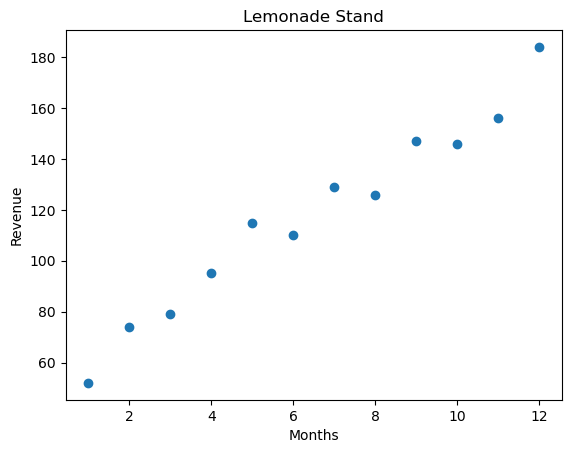

In [1]:
# import ;ib
import matplotlib.pyplot as plt

# create ex dataset
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# plot data
plt.plot(months, revenue, "o")
plt.title("Lemonade Stand")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

-> Points and Lines

A line is determined by its slope and its intercept. In other words, for each point y on a line we can say: y = mx + b or wx + b

; m = slope, b = intercept, y = a given point on the y-axis, and it corresponds to given x on the x-axis.

The slope is a measure of how steep the line is, while the intercept is a measure of where the line hits the y-axis.

When we perform Linear Regression, the goal is to get the “best” m and b for our data.

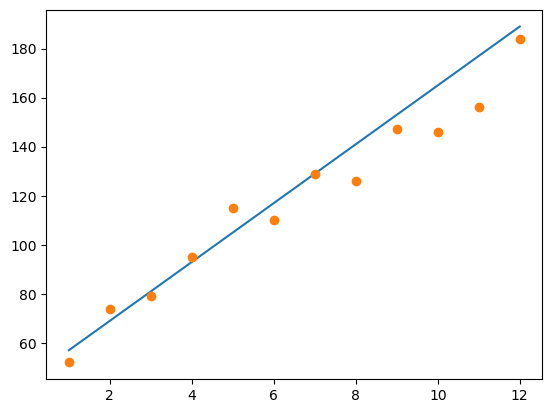

In [2]:
# import lib
import matplotlib.pyplot as plt

# ex dataset
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# instantisate ex slope and intercept
m = 12
b = 45
# target
# Create a new list, y, that has every element in months, multiplied by m and added to b.
# A list comprehension is probably the easiest way to do this!
y = [m*month + b for month in months]

# plot the y values against months as a line on top of the scatterplot
# y values(line)
plt.plot(months, y)
# datapoint (scatter plot)
plt.plot(months, revenue, "o")
plt.show()

### Loss

We have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance).

In [4]:
# ex dataset
x = [1, 2, 3]
y = [5, 1, 3]

# ex slope and intercept(1)
m1 = 1
b1 = 0

# ex slope and intercept(1)
m2 = 0.5
b2 = 1

# Find the y-values that the line with weights m1 and b1 would predict for the x-values given
y_predicted1 = [m1*x[i] + b1 for i in range(len(x))]

# Find the y-values that the line with weights m1 and b1 would predict for the x-values given
y_predicted2 = [m2*x[i] + b2 for i in range(len(x))]

# create variable to store the loss va;ues
total_loss1 = 0.
total_loss2 = 0.

# find the sum of the squared distance between the actual y-values of the points and the y_predicted1 values
for i in range(len(y)):
    total_loss1 += (y[i] - y_predicted1[i])**2

for i in range(len(y)):
    total_loss2 += (y[i] - y_predicted2[i])**2

# show loss1 and loss2
print(total_loss1, total_loss2)

17.0 13.5


so, toal_loss1: 17.0 > total_loss2: 13.5 that means m2 and b2 is better than m1 and b1 for this model.

### Minimizing Loss

The goal of a linear regression model is to find the slope(m) and intercept(b) pair that minimizes loss on average across all of the data.

Q: is there always only one line of best-fit?

A: No, some datasets can have more than one line of best-fit. This is not that common but can occur with smaller datasets.

## Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom.

The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be: 
$$ (-2/N) \sum\limits_{i = 1}^{N} (y_{i}-(mx_{i} + b))

* N is the number of points we have in our dataset
* m is the current gradient guess
* b is the current intercept guess

In [5]:
# define a function gradient at b
def get_gradient_at_b(x, y, m, b):
    # sum of all values
    diff = 0.
    for i in range(len(x)):
        diff += y[i] - (m*x[i] + b)
    N = len(x)
    b_gradient = (-2/N)*diff
    return b_gradient

## Gradient Descent for Slope

We have a function to find the gradient of b at every point. To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula: 
$$ (-2/N) \sum\limits_{i = 1}^{N} x_{i}(y_{i}-(mx_{i} + b))

* N is the number of points you have in your dataset
* m is the current gradient guess
* b is the current intercept guess

In [6]:
# define a function gradient at b
def get_gradient_at_m(x, y, m, b):
    # sum of all values
    diff = 0.
    for i in range(len(x)):
        diff += x[i]*(y[i] - (m*x[i] + b))
    N = len(x)
    m_gradient = (-2/N)*diff
    return m_gradient

## Put it Together

Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a learning rate.
To find a new b value, we would say:

new_b = current_b - (learning_rate * b_gradient)

where current_b is our guess for what the b value is, b_gradient is the gradient of the loss curve at our current guess, and learning_rate is proportional to the size of the step we want to take.

In [9]:
# gradient at intercept(b)
def get_gradient_at_b(x, y, b, m):
    diff = 0.
    for i in range(len(x)):
        diff += (y[i] - (m*x[i] + b))
    N = len(x)
    b_gradient = (-2/N)*diff
    return b_gradient

# gradient at slope(m)
def get_gradient_at_m(x, y, b, m):
    diff = 0.
    for i in range(len(x)):
        diff += x[i]*(y[i] - (m*x[i] + b))
    N = len(x)
    m_gradient = (-2/N)*diff
    return m_gradient

# define step gradient
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    # says learning rate = 0.01
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return b, m

# ex dataset
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept and slope guess:
b = 0
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

2.355 17.78333333333333


## Convergence

How do we know when we should stop changing the parameters m and b? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters m and b.

## Learning Rate

We want our program to be able to iteratively learn what the best m and b values are. So for each m and b pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go.

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge!

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

## Put it Together II

At each step, we know how to calculate the gradient and move in that direction with a step size proportional to our learning rate. Now, we want to make these steps until we reach convergence.

let’s create a function called gradient_descent() that takes in x, y, learning_rate, and a num_iterations

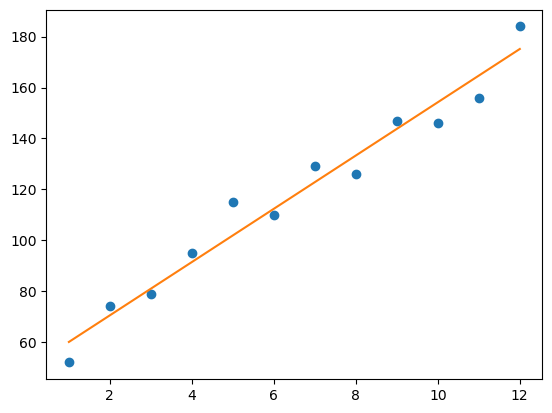

In [10]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#update step_gradient parameter add learning_rate
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

# gradient descent (core function)
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0.
    m = 0.
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return b, m

# ex dataset
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# run gradient descent function to get best b, m
# says learning = 0.01 and iterations = 1000
b, m = gradient_descent(months, revenue, 0.01, 1000)

# instantiate model
y = [m*x + b for x in months]

# plot the result
# plot data point from dataset
plt.plot(months, revenue, "o")
# plot the model
plt.plot(months, y)
plt.show()

## Use Functions on Real Data

We have constructed a way to find the “best” b and m values using gradient descent! Let’s try this on the set of baseball players’ heights and weights.

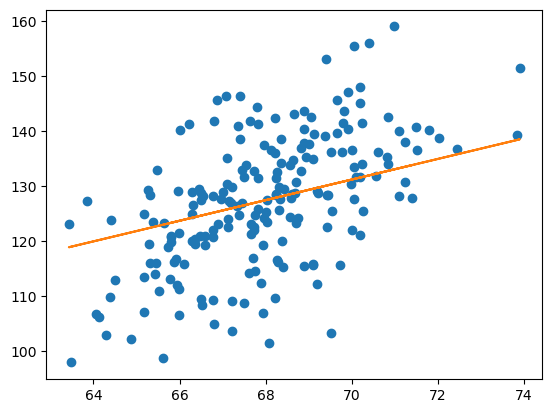

In [12]:
# import lib
import pandas as pd
import matplotlib.pyplot as plt

# read csv file
df = pd.read_csv("heights.csv")

X = df["height"]
y = df["weight"]

# use gradient descent function to get best b and m
b, m = gradient_descent(X, y, num_iterations = 1000, learning_rate = 0.0001)

# create a list that store the predictions
y_predictions = [m*X[i] + b for i in range(len(X))]

# plot data points as a scatter plot
plt.plot(X, y, "o")

#plot the model
plt.plot(X, y_predictions)
plt.show()